<a href="https://colab.research.google.com/github/byrcewang/DL_SS2H/blob/main/CIFAR_10_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified


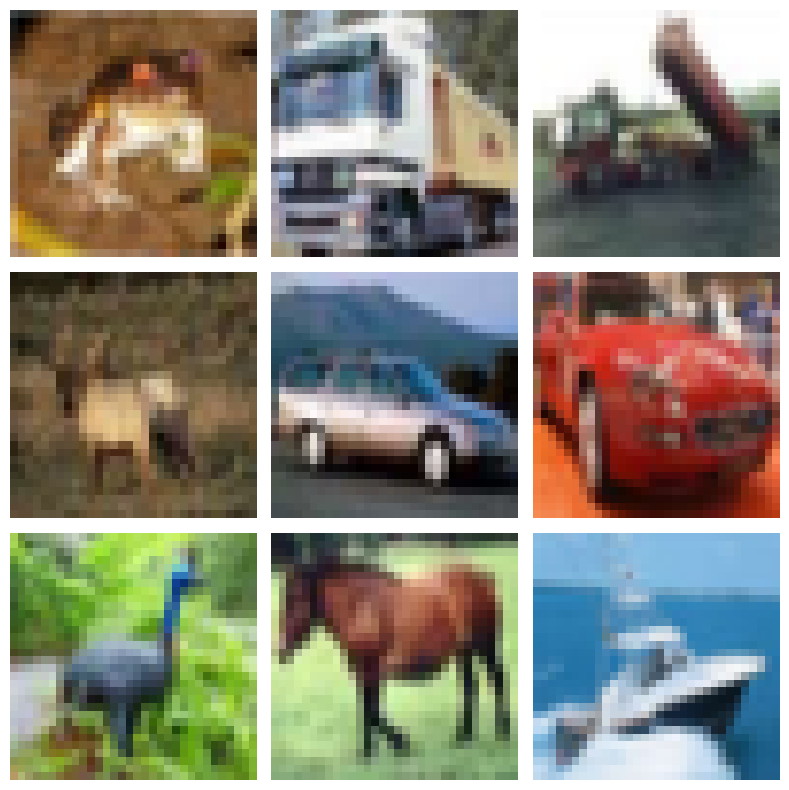

In [28]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Download CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

# Get some sample images
sample_images = [train_dataset[i][0] for i in range(9)]

# Convert tensor images to numpy arrays for visualization
sample_images = [np.array(image) for image in sample_images]

# Plot the sample images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i])
    ax.axis('off')
plt.tight_layout()
plt.show()


# transform_train = transforms.Compose([  ## Data augmentation
#     transforms.RandomCrop(32, padding=4),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(degrees=15),
#     transforms.RandomVerticalFlip(p=0.5),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#     transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

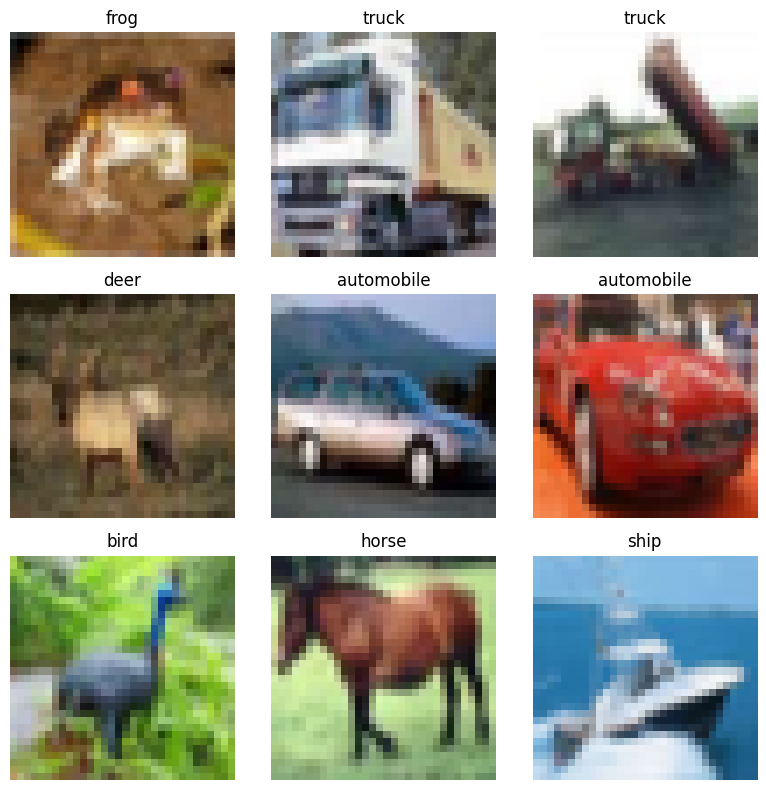

In [32]:

# Define the class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get some sample images and labels
sample_images = [train_dataset[i][0] for i in range(9)]
sample_labels = [class_labels[train_dataset[i][1]] for i in range(9)]

# Convert tensor images to numpy arrays for visualization
sample_images = [np.array(image) for image in sample_images]

# Plot the sample images with labels
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i])
    ax.set_title(sample_labels[i])  # Set the title as the label
    ax.axis('off')
plt.tight_layout()
plt.show()

Files already downloaded and verified


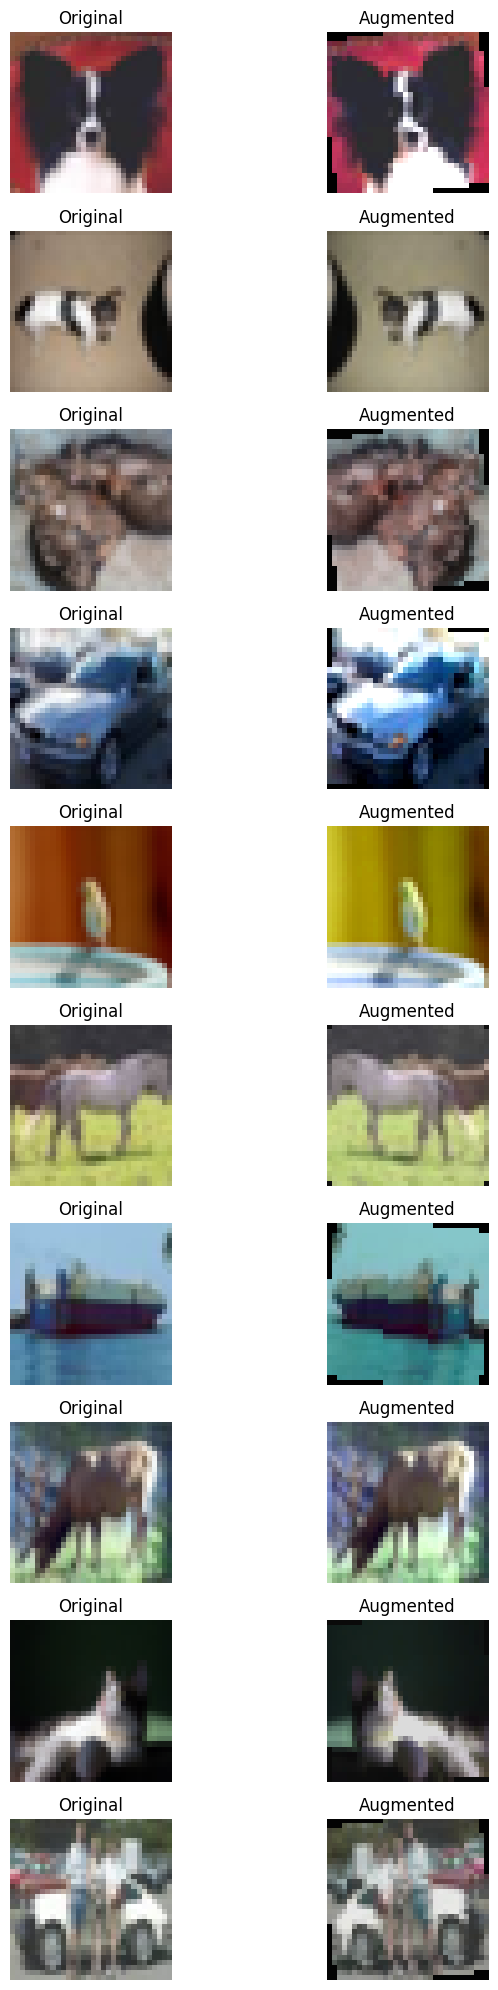

In [24]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)

# Get 10 sample images
sample_images, _ = next(iter(train_loader))
sample_images = np.transpose(sample_images.numpy(), (0, 2, 3, 1))

# Convert numpy arrays to PIL Images
sample_images = [torchvision.transforms.ToPILImage()(image) for image in sample_images]

# Define data augmentation transformations
augmentation_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(10),
    torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])

# Apply data augmentation to the sample images
augmented_images = [augmentation_transforms(image) for image in sample_images]

# Convert PIL Images to numpy arrays for visualization
sample_images = [np.array(image) for image in sample_images]
augmented_images = [np.array(image) for image in augmented_images]

# Visualize the original and augmented images
fig, axes = plt.subplots(10, 2, figsize=(10, 20))
for i in range(10):
    axes[i, 0].imshow(sample_images[i])
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')
    axes[i, 1].imshow(augmented_images[i])
    axes[i, 1].set_title('Augmented')
    axes[i, 1].axis('off')
plt.tight_layout()
plt.show()

Files already downloaded and verified
Files already downloaded and verified


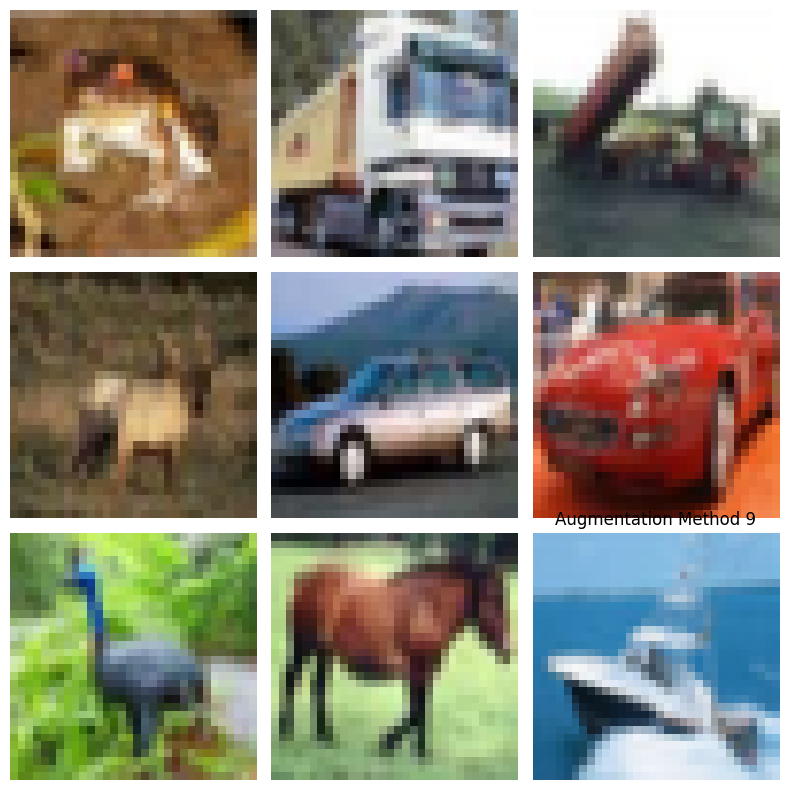

Files already downloaded and verified


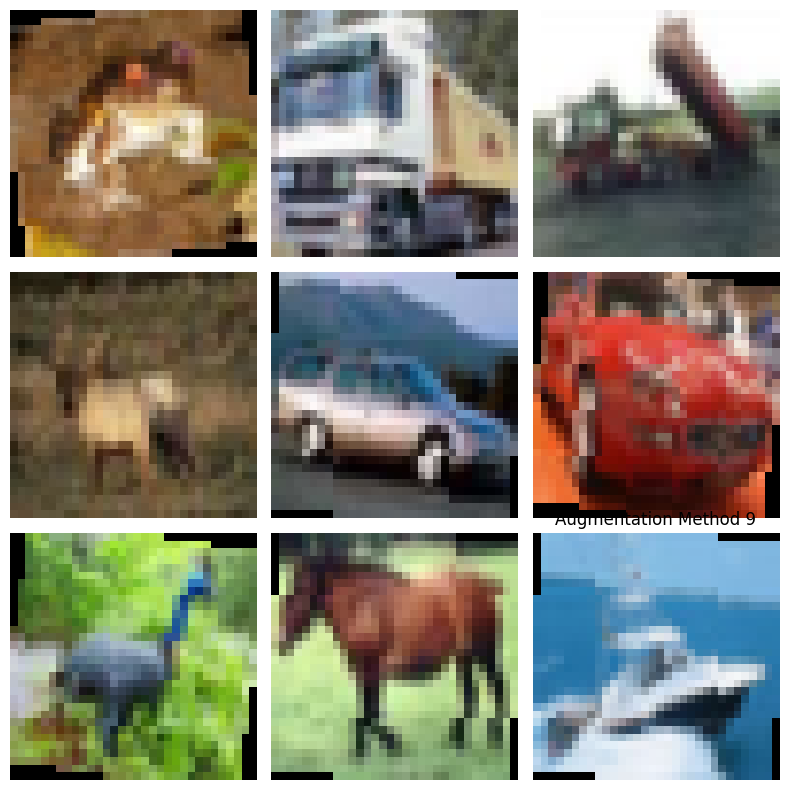

Files already downloaded and verified


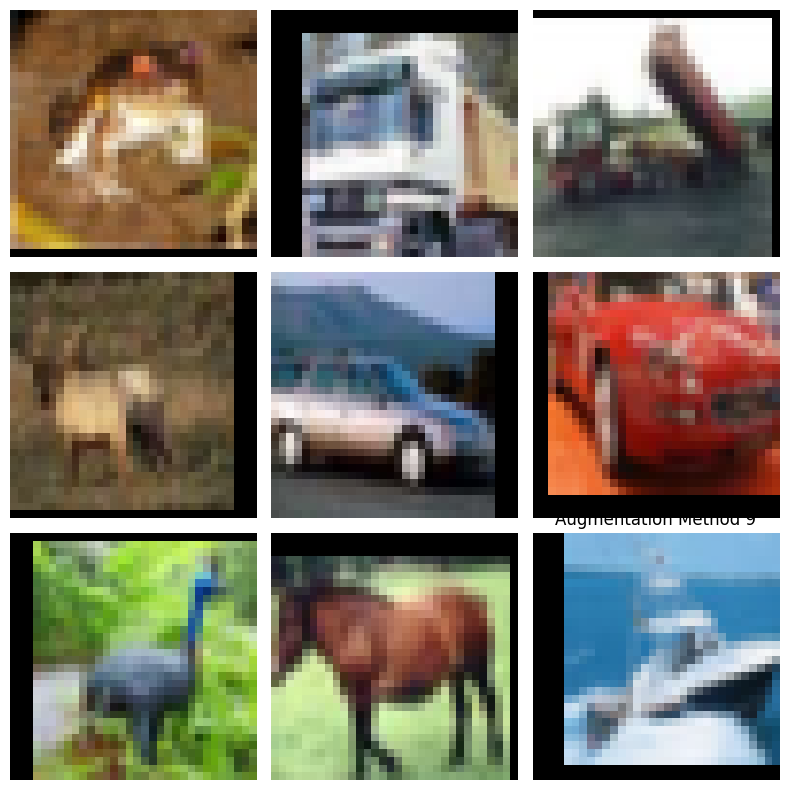

Files already downloaded and verified


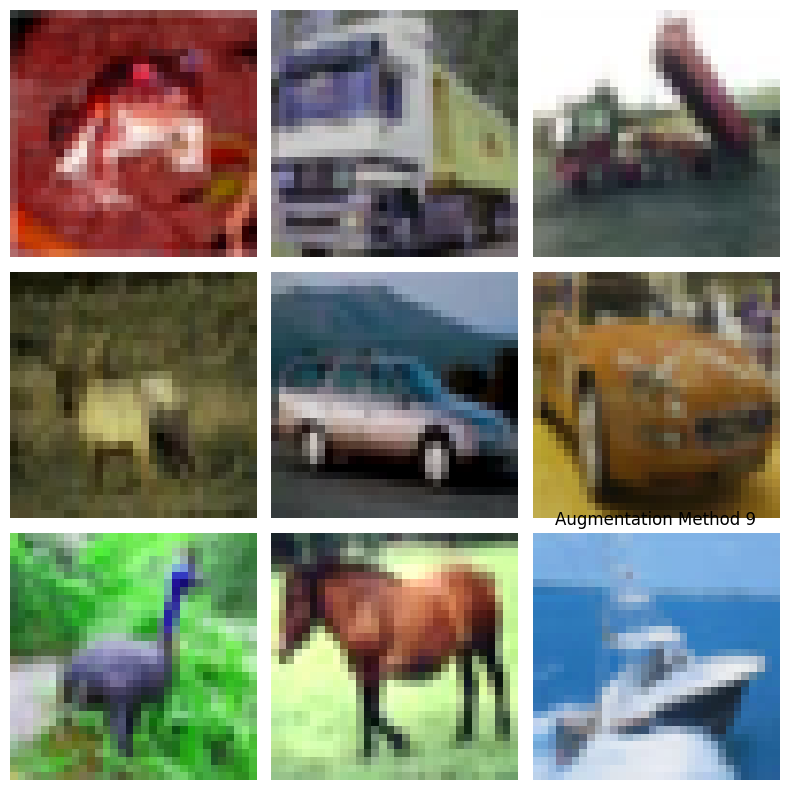

Files already downloaded and verified


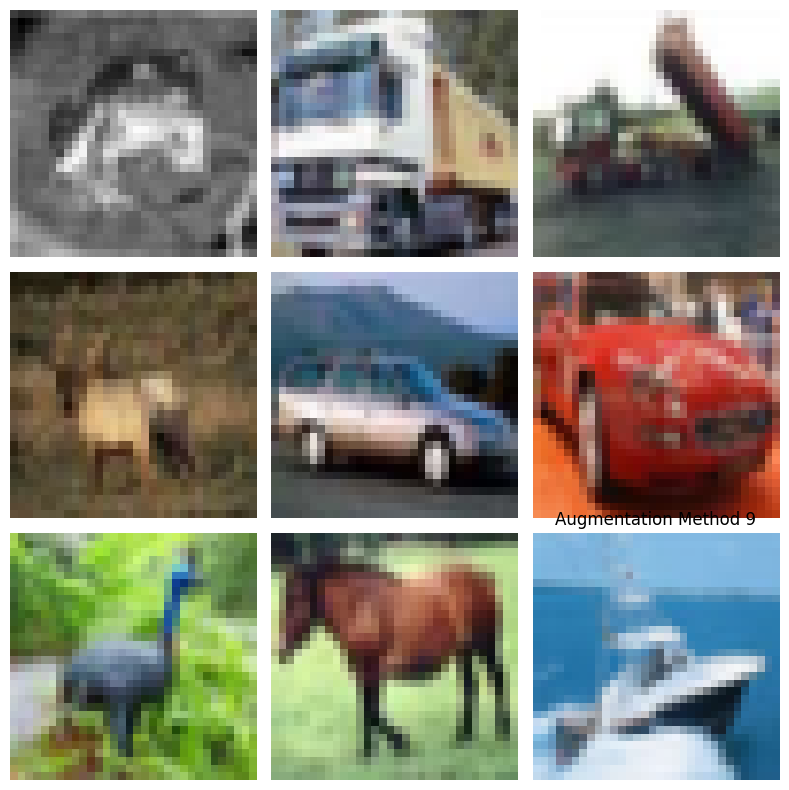

Files already downloaded and verified


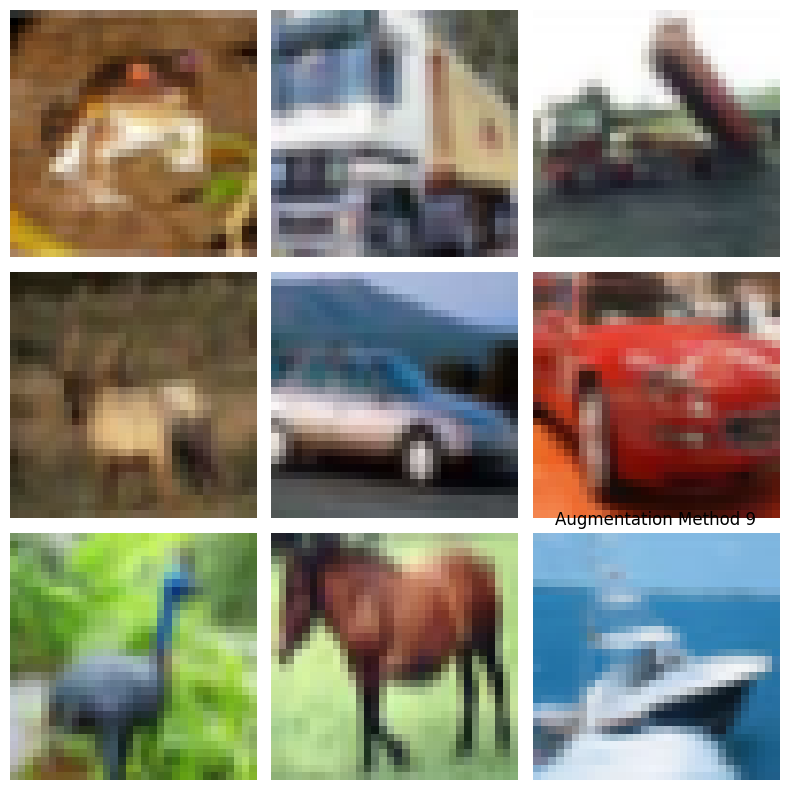

Files already downloaded and verified


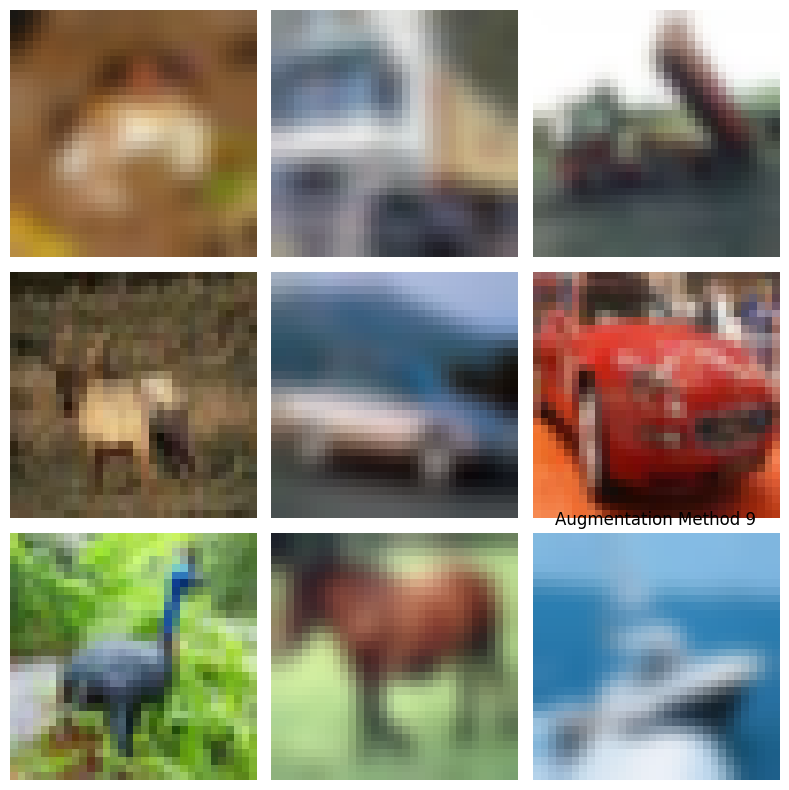

Files already downloaded and verified


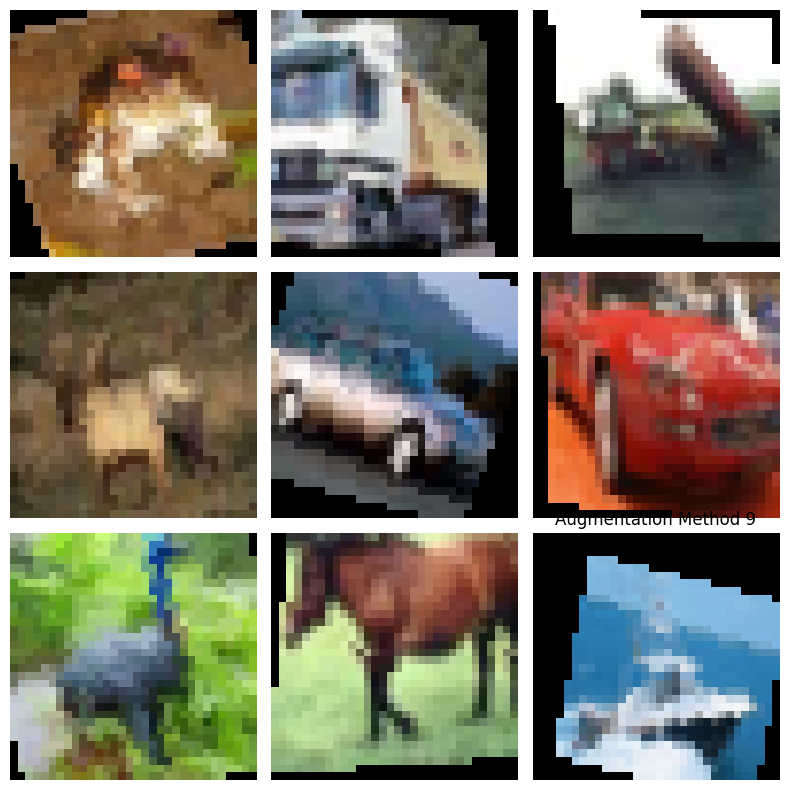

Files already downloaded and verified


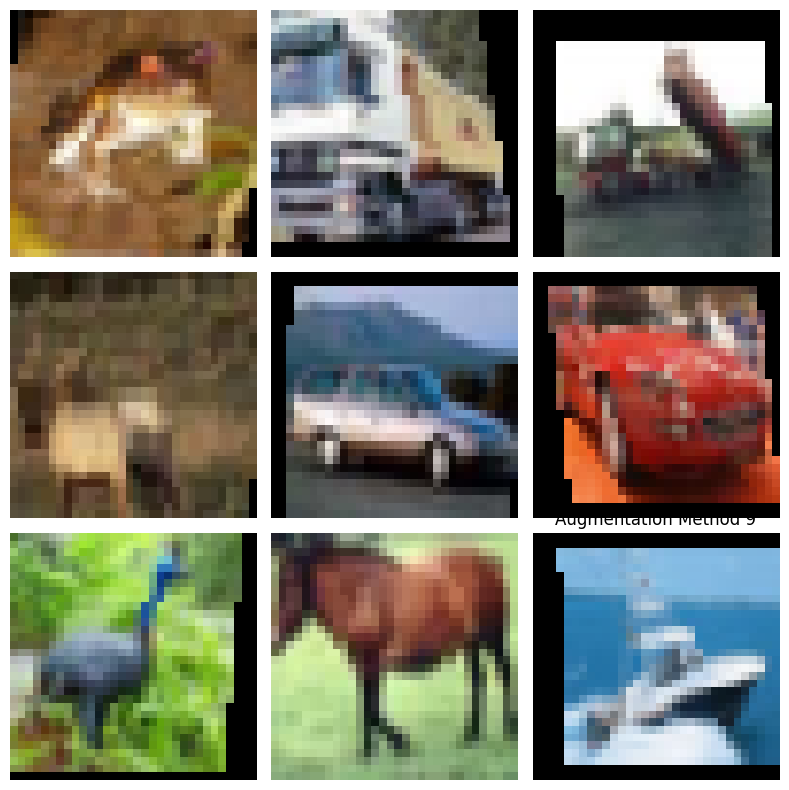

Files already downloaded and verified


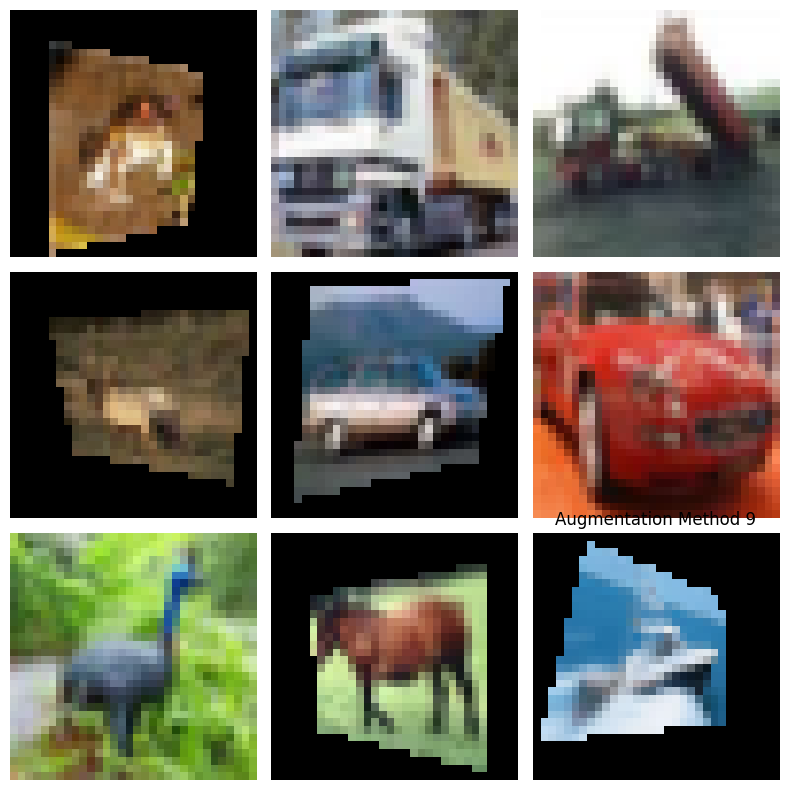

In [35]:
import torch
import torchvision
from torchvision import transforms

# Download CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

# Define the data augmentation transformations
data_transforms = [
    # 1. Random Horizontal Flip
    transforms.Compose([transforms.RandomHorizontalFlip(p=1)]),

    # 2. Random Rotation
    transforms.Compose([transforms.RandomRotation(10)]),

    # 3. Random Crop
    transforms.Compose([transforms.RandomCrop(32, padding=4)]),

    # 4. Color Jittering
    transforms.Compose([transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)]),

    # 5. Random Grayscale
    transforms.Compose([transforms.RandomGrayscale(p=0.1)]),

    # 6. Random Resized Crop
    transforms.Compose([transforms.RandomResizedCrop(32, scale=(0.8, 1.0))]),

    # 7. Gaussian Blur
    transforms.Compose([transforms.GaussianBlur(kernel_size=5)]),

    # 8. Random Affine Transformation with degrees and shear
    transforms.Compose([transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10)]),

    # 9. Shear Transformation with a specified shear angle
    transforms.Compose([transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10)]),

    # 10. Perspective Transformation
    transforms.Compose([transforms.RandomPerspective(distortion_scale=0.5)]),
]

# Apply data augmentation to the dataset and visualize the augmented images
for i, transform in enumerate(data_transforms):
    augmented_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

    # Get some sample images
    sample_images = [augmented_dataset[i][0] for i in range(9)]

    # Convert tensor images to numpy arrays for visualization
    sample_images = [np.array(image) for image in sample_images]

    # Plot the sample images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(sample_images[i])
        ax.axis('off')
    plt.tight_layout()
    plt.title(f"Augmentation Method {i + 1}")
    plt.show()


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Data Augmentation
# transform_train = transforms.Compose([
#     transforms.RandomCrop(32, padding=4),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])
transform_train = transforms.Compose([  ## Data augmentation
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=32, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [5]:
print(len(trainloader))
len(testloader)

391


79

In [6]:
print(len(trainset))
len(testset)

50000


10000